In [1]:
import dicom, cv2, caffe
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # we ignore a RuntimeWarning produced from dividing by zero

import iou

In [2]:
caffe.set_mode_gpu()
net = iou.load_net()
img, ll = iou.load_array('o1.pk')

In [ ]:
print img.shape
plt.imshow(img[0])
plt.show()

In [11]:
def sw(img_list):
    if not isinstance(img_list,list):
        img_list = [img_list]
    for img in img_list:
        plt.imshow(img)
        plt.show()

def predit_single(img,net):
    in_ = np.expand_dims(img, axis=0)
    in_ -= np.array([iou.MEAN_VALUE])
    net.blobs['data'].reshape(1, *in_.shape)
    net.blobs['data'].data[...] = in_
    net.forward()
    prob = net.blobs['prob'].data
    obj = prob[0][1]
    pred = np.where(obj > iou.THRESH, 1, 0)
    return pred
#     all_masks[i][j] = preds
#     all_areas[i][j] = np.count_nonzero(preds)
 
def predit_some(img,net):
    img = img[:,None,:,:]
    img -= np.array([iou.MEAN_VALUE])
    net.blobs['data'].reshape(*img.shape)
    net.blobs['data'].data[...] = img
    net.forward()
    prob = net.blobs['prob'].data
    obj = prob[:,1]
#     print obj.shape
    pred = np.where(obj > iou.THRESH, 1, 0)
    return pred
    

In [ ]:
i = img[:,None,:,:]
print i.shape
# diff = (i[0,0] == img[0])
sw(img[0])
sw(i[0,0])

In [5]:
p = predit_some(img[:2],net)
print p.shape

(2, 256, 256)


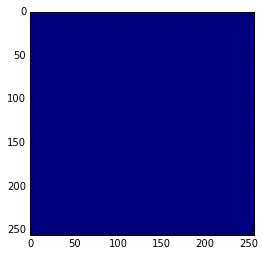

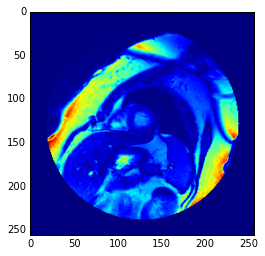

In [9]:
sw(p[0])
sw(img[0])

(256, 256)


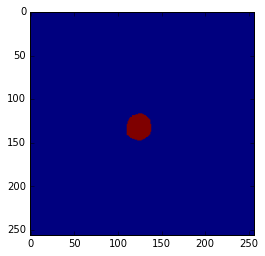

In [12]:
p1 = predit_single(img[8],net)
print p1.shape
sw(p1)

In [13]:
i = img[7:10][:,None,:,:]
i -= np.array([iou.MEAN_VALUE])
print i.shape
net.blobs['data'].reshape(*i.shape)
net.blobs['data'].data[...] = i
net.forward()
prob = net.blobs['prob'].data
obj = prob[:,1]
#     print obj.shape
pred = np.where(obj > iou.THRESH, 1, 0)

(3, 1, 256, 256)


In [15]:
print prob.shape
print obj.shape

(3, 2, 256, 256)
(3, 256, 256)


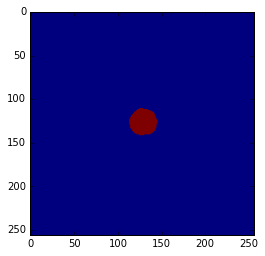

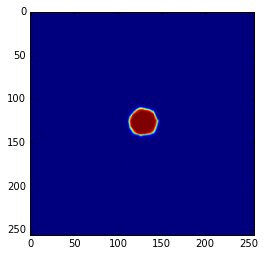

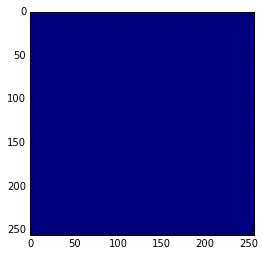

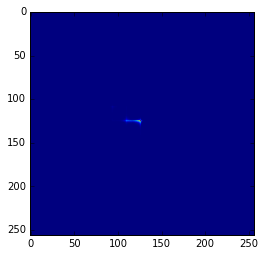

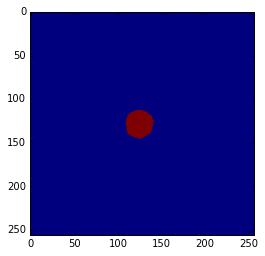

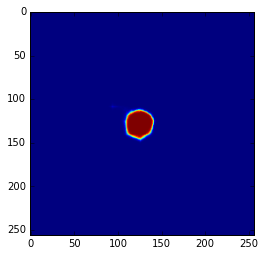

In [18]:
for i in range(3):
    sw(pred[i])
    sw(prob[i,1])